In [1]:
# Importing packages, modules.
import numpy as np
import qutip as qt

from qutip.qip.operations import x_gate, y_gate, z_gate, s_gate, t_gate, snot, rx, ry, rz, swap, iswap, swapalpha,cnot, cz_gate, globalphase

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

See QuTiP documentation at https://qutip.org/docs/latest/index.html

# The quantum object class


In [2]:
psi = qt.Qobj() # create an empty quantum object class
psi

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

### State vectors

In [3]:
spin_down_vector = np.array([1,0]) # create a nummpy [1,0] array
spin_down = qt.Qobj(spin_down_vector) # initialize Qobj with numpy array
spin_down

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [6]:
# create the Qobj of the |0> state
qt.basis(2,0) 

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [7]:
# create the Qobj of the |1> state
qt.basis(2,1) 

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [8]:
# create the Qobj of the |+> state
(qt.basis(2,0) + qt.basis(2,1)).unit() #  .unit() normalizes the state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

### Operators

In [11]:
# # create the Qobj of the Pauli operators
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

In [13]:
sx

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [14]:
sy

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [17]:
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [18]:
# find eigenenergies and eigenstates
sx.eigenstates()

(array([-1.,  1.]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[ 0.70710678]
  [-0.70710678]],
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70710678]
  [0.70710678]]], dtype=object))

In [19]:
# commutation relationship
qt.commutator(sx, sz) 

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0. -2.]
 [ 2.  0.]]

In [20]:
# sigma_x operation on the |0> state
sx * qt.basis(2,0) 

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

### Measurements

In [21]:
spin_down = qt.basis(2,0)
spin_up   = qt.basis(2,1)
plus_state = (spin_up + spin_down).unit()
plus_state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [22]:
qt.expect(sz, plus_state) # <+|sigma_z|+>

0.0

In [23]:
qt.expect(sz, spin_up) # <1|sigma_z|1>

-1.0

### Tensor states and entanglement

In [24]:
# |0>|0> tensor product or |00>
qt.tensor(spin_down,spin_down)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [25]:
bellState = (qt.tensor(spin_down,spin_down) + qt.tensor(spin_up,spin_up)).unit() # (|00>+|11>)/sqrt(2)

bellState

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

In [26]:
qt.bell_state('00') # (|00>+|11>)/sqrt(2) using build-in-function

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]

In [27]:
# calculate the concurrence 
qt.concurrence(bellState) 

0.9999999999999993

In [29]:
# example from class: |psi> = (|00> + |10> + |01>) / sqrt(3)

psi = (qt.tensor(spin_down,spin_down) + qt.tensor(spin_up,spin_down) + qt.tensor(spin_down,spin_up)).unit()
psi

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.57735027]
 [0.57735027]
 [0.57735027]
 [0.        ]]

In [30]:
qt.concurrence(psi) # calculate the concurrence 

0.6666666666666667

In [32]:
# sigma_z, sigma_z tensor product
ZZ = qt.tensor(qt.sigmaz(), qt.sigmaz())
ZZ

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]

### Bloch sphere

<IPython.core.display.Javascript object>


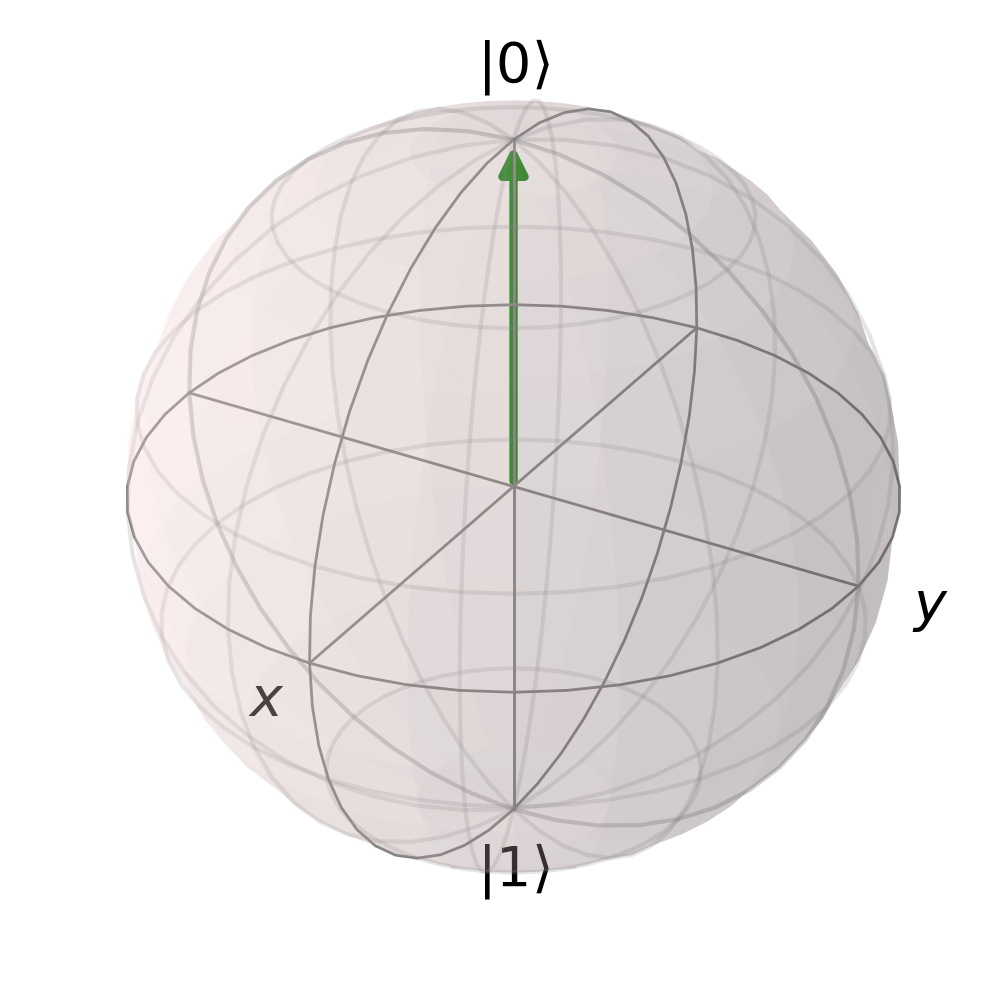

In [31]:
psi = qt.basis(2,0) # |0>

bloch_sphere = qt.Bloch() # create the Bloch sphere

bloch_sphere.add_states(psi)  # plot the state on the Bloch sphere
bloch_sphere.render()

# Clifford gates

### X gate

In [34]:
x_gate()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

<IPython.core.display.Javascript object>


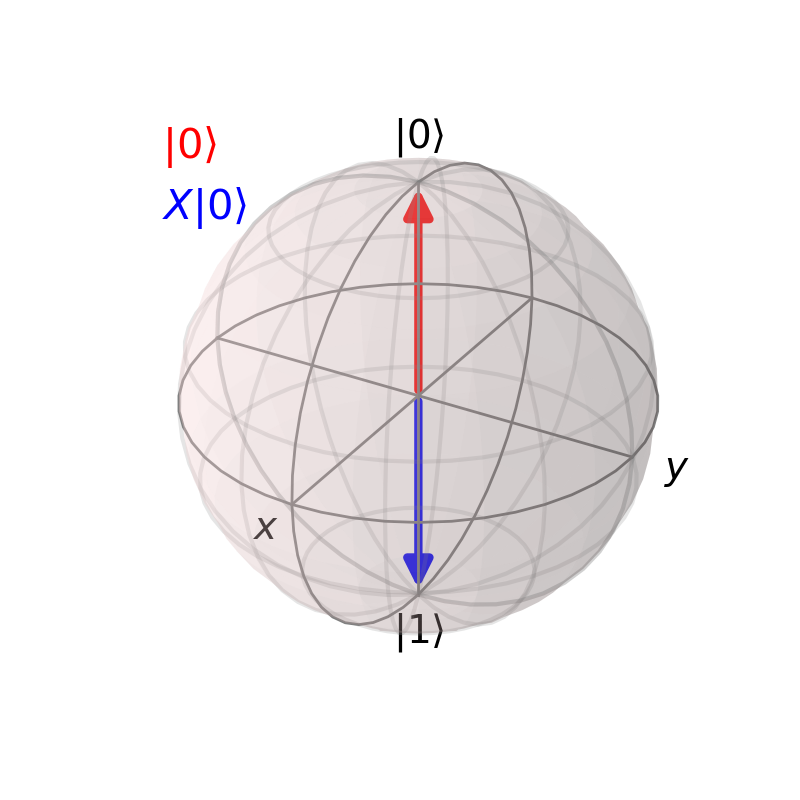

In [35]:
psi_0 = qt.basis(2,0) # |0>
psi_1 = x_gate() * psi_0 # X|0>

# create the Bloch sphere
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs)
bloch_sphere.figsize = [3,3]
bloch_sphere.font_size = 14
bloch_sphere.vector_color = ['r', 'b']

# plot the state on the Bloch spheres
bloch_sphere.add_states([psi_0, psi_1])  

bloch_sphere.render(fig=fig, axes=axs)
axs.annotate(r'$|0\rangle$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$X|0\rangle$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='b')

plt.show()

### Y gate

In [37]:
y_gate()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

<IPython.core.display.Javascript object>


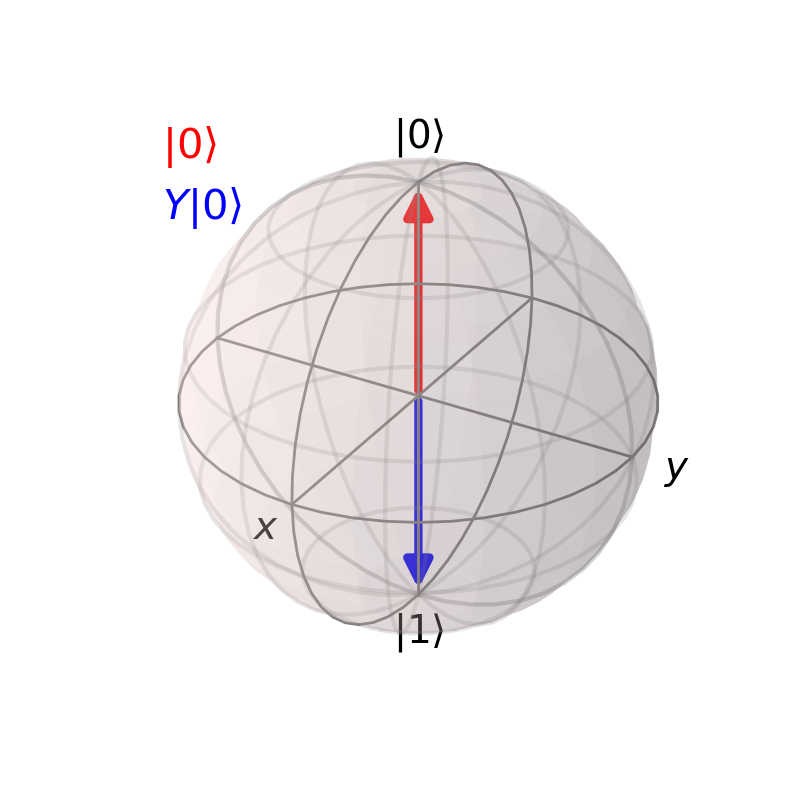

In [38]:
psi_0 = qt.basis(2,0) # |0>
psi_1 = y_gate() * psi_0 # Z|0>

# create the Bloch sphere
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs)
bloch_sphere.figsize = [3,3]
bloch_sphere.font_size = 14
bloch_sphere.vector_color = ['r', 'b']

# plot the state on the Bloch spheres
bloch_sphere.add_states([psi_0, psi_1])  

bloch_sphere.render(fig=fig, axes=axs)
axs.annotate(r'$|0\rangle$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$Y|0\rangle$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='b')

plt.show()

### Z gate

In [39]:
z_gate()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

<IPython.core.display.Javascript object>


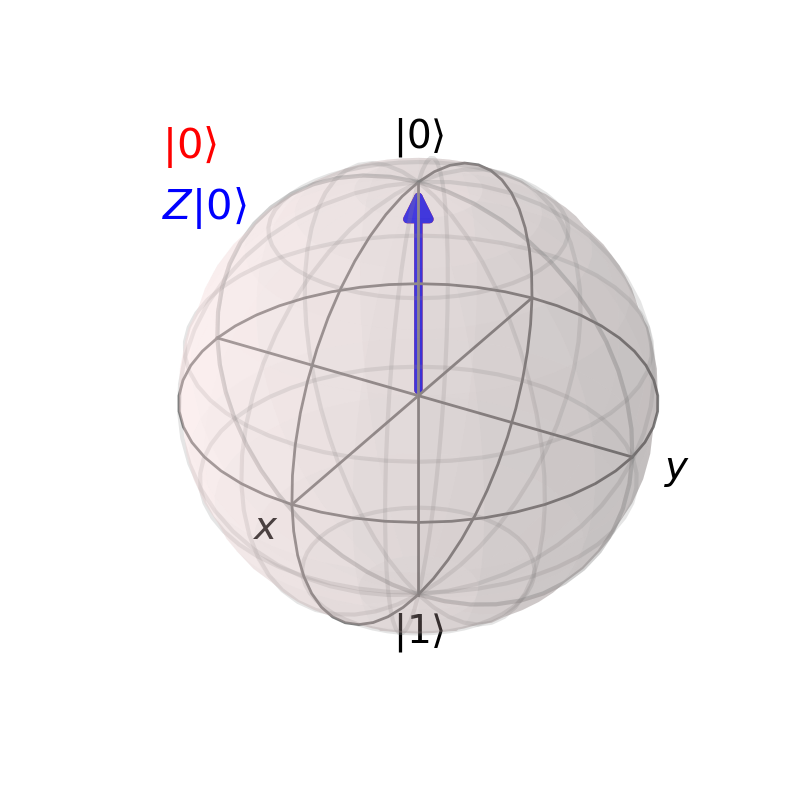

In [40]:
psi_0 = qt.basis(2,0) # |0>
psi_1 = z_gate() * psi_0 # Z|0>

# create the Bloch sphere
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs)
bloch_sphere.figsize = [3,3]
bloch_sphere.font_size = 14
bloch_sphere.vector_color = ['r', 'b']

# plot the state on the Bloch spheres
bloch_sphere.add_states([psi_0, psi_1])  

bloch_sphere.render(fig=fig, axes=axs)
axs.annotate(r'$|0\rangle$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$Z|0\rangle$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='b')

plt.show()

### Hadamard gate

In [41]:
snot()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

<IPython.core.display.Javascript object>


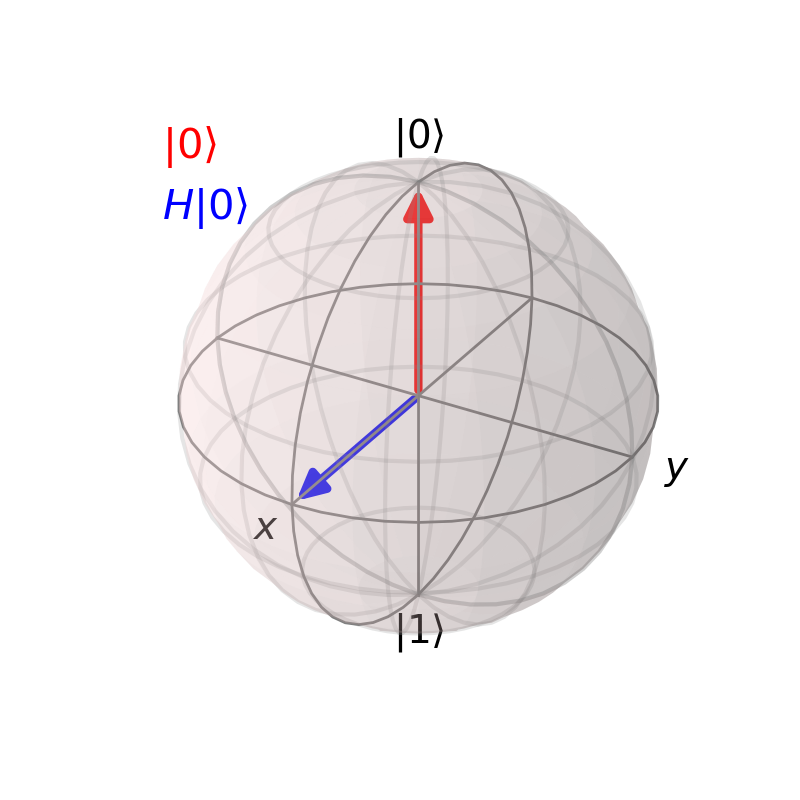

In [42]:
psi_0 = qt.basis(2,0) # |0>
psi_1 = snot() * psi_0 # H|0>

# create the Bloch sphere
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs)
bloch_sphere.figsize = [3,3]
bloch_sphere.font_size = 14
bloch_sphere.vector_color = ['r', 'b']

# plot the state on the Bloch spheres
bloch_sphere.add_states([psi_0, psi_1])  

bloch_sphere.render(fig=fig, axes=axs)
axs.annotate(r'$|0\rangle$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$H|0\rangle$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='b')

plt.show()

### Phase gate

In [43]:
s_gate()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

<IPython.core.display.Javascript object>


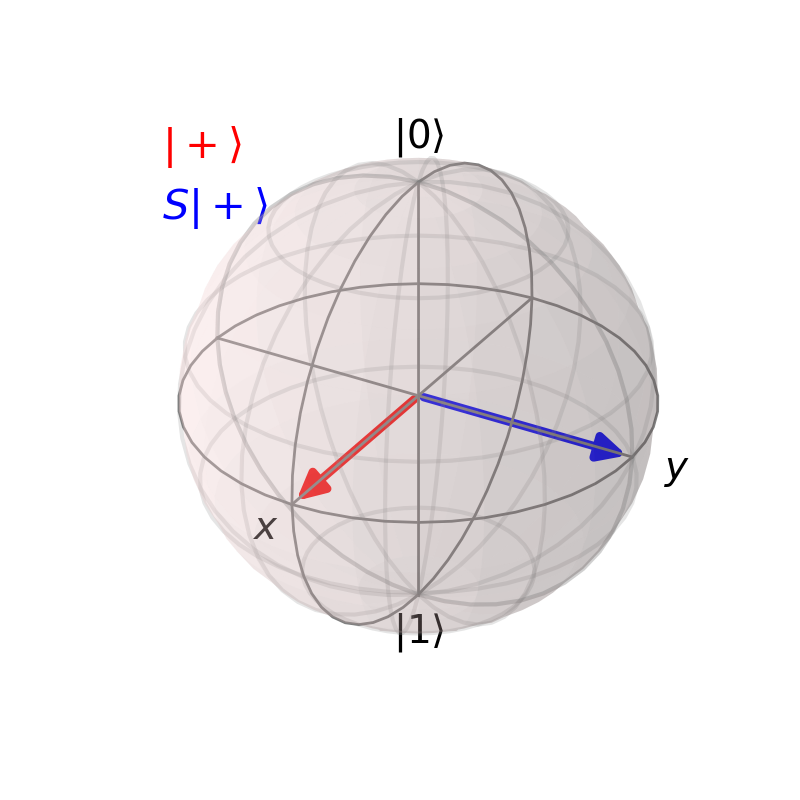

In [45]:
psi_0 = (qt.basis(2,0) + qt.basis(2,1)).unit() # |+>
psi_1 = s_gate() * psi_0 # S|+>

# create the Bloch sphere
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs)
bloch_sphere.figsize = [3,3]
bloch_sphere.font_size = 14
bloch_sphere.vector_color = ['r', 'b']

# plot the state on the Bloch spheres
bloch_sphere.add_states([psi_0, psi_1])  

bloch_sphere.render(fig=fig, axes=axs)
axs.annotate(r'$|+\rangle$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$S|+\rangle$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='b')

plt.show()

### Generating X gate from {S,H}

In [46]:
snot() * s_gate() * s_gate() * snot()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

<IPython.core.display.Javascript object>


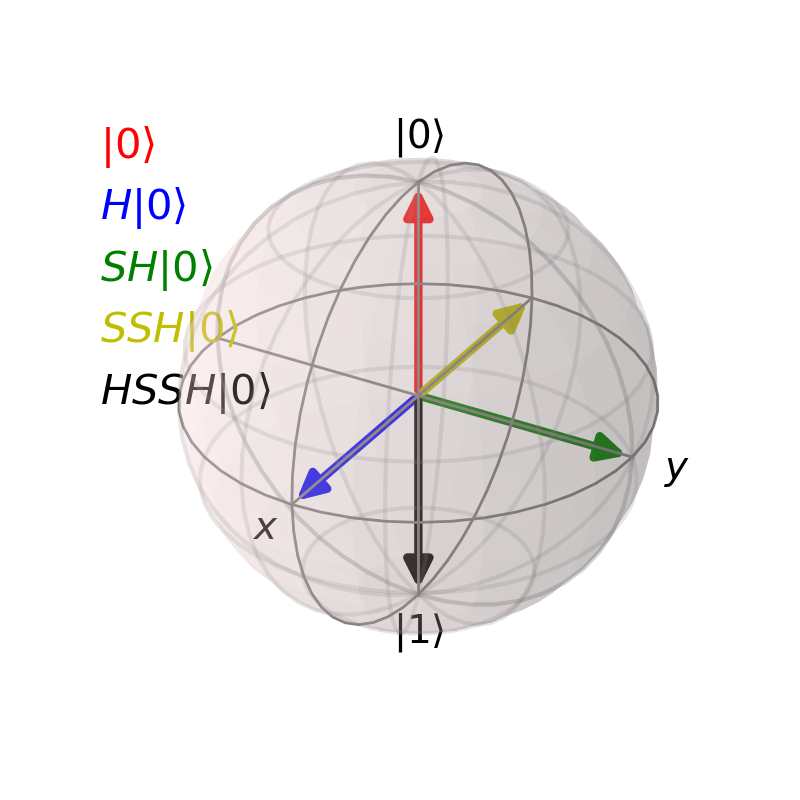

In [47]:
psi_0 = qt.basis(2,0) # |0>
psi_1 = snot() * psi_0 # H|0>
psi_2 = s_gate() * psi_1 # SH|0>
psi_3 = s_gate() * psi_2 # SSH|0>
psi_4 = snot() * psi_3 # HSSH|0>

# create the Bloch sphere
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs)
bloch_sphere.figsize = [3,3]
bloch_sphere.font_size = 14
bloch_sphere.vector_color = ['r', 'b', 'g', 'y', 'k']

# plot the state on the Bloch spheres
bloch_sphere.add_states([psi_0, psi_1, psi_2, psi_3, psi_4])  

bloch_sphere.render(fig=fig, axes=axs)
axs.annotate(r'$|0\rangle$', xy=(0, 0.9), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$H|0\rangle$', xy=(0, 0.8), xycoords='axes fraction', fontsize=15, color='b')
axs.annotate(r'$SH|0\rangle$', xy=(0, 0.7), xycoords='axes fraction', fontsize=15, color='g')
axs.annotate(r'$SSH|0\rangle$', xy=(0, 0.6), xycoords='axes fraction', fontsize=15, color='y')
axs.annotate(r'$HSSH|0\rangle$', xy=(0, 0.5), xycoords='axes fraction', fontsize=15, color='k')

plt.show()

### T-gate

In [48]:
t_gate()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]

<IPython.core.display.Javascript object>


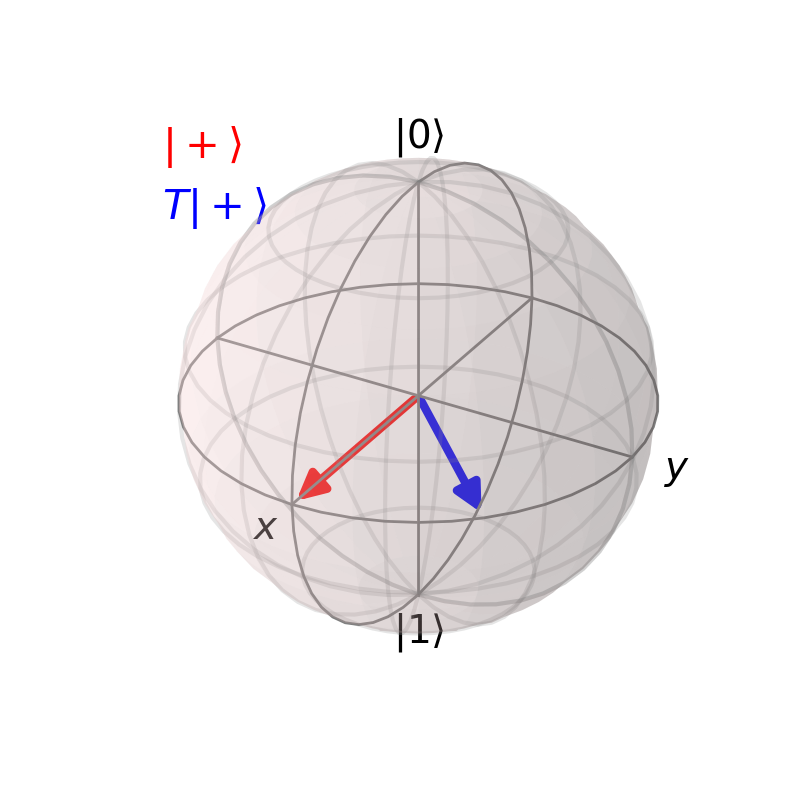

In [49]:
psi_0 = (qt.basis(2,0) + qt.basis(2,1)).unit() # |+>
psi_1 = t_gate() * psi_0 # T|+>

# create the Bloch sphere
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs)
bloch_sphere.figsize = [3,3]
bloch_sphere.font_size = 14
bloch_sphere.vector_color = ['r', 'b']

# plot the state on the Bloch spheres
bloch_sphere.add_states([psi_0, psi_1])  

bloch_sphere.render(fig=fig, axes=axs)
axs.annotate(r'$|+\rangle$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$T|+\rangle$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='b')

plt.show()

### Covering the Bloch sphere

In [50]:
bloch_sphere = qt.Bloch()
bloch_sphere.point_color = ['b']

bloch_sphere.point_size = [20]
bloch_sphere.point_marker = ['o']


state = qt.basis(2,0)

for n in range(20):
    
    state = x_gate() * state
    
    for n in range(50):
    
        state = t_gate() * snot() * state
    
        bloch_sphere.add_states(state, kind='point')

state = qt.basis(2,0)
        
for n in range(20):
    
    state = y_gate() * state
    
    for n in range(50):
    
        state = t_gate() * snot() * state
    
        bloch_sphere.add_states(state, kind='point')

state = qt.basis(2,0)
        
for n in range(20):
    
    state = z_gate() * state
    
    for n in range(50):
    
        state = t_gate() * snot() * state
    
        bloch_sphere.add_states(state, kind='point')


<IPython.core.display.Javascript object>


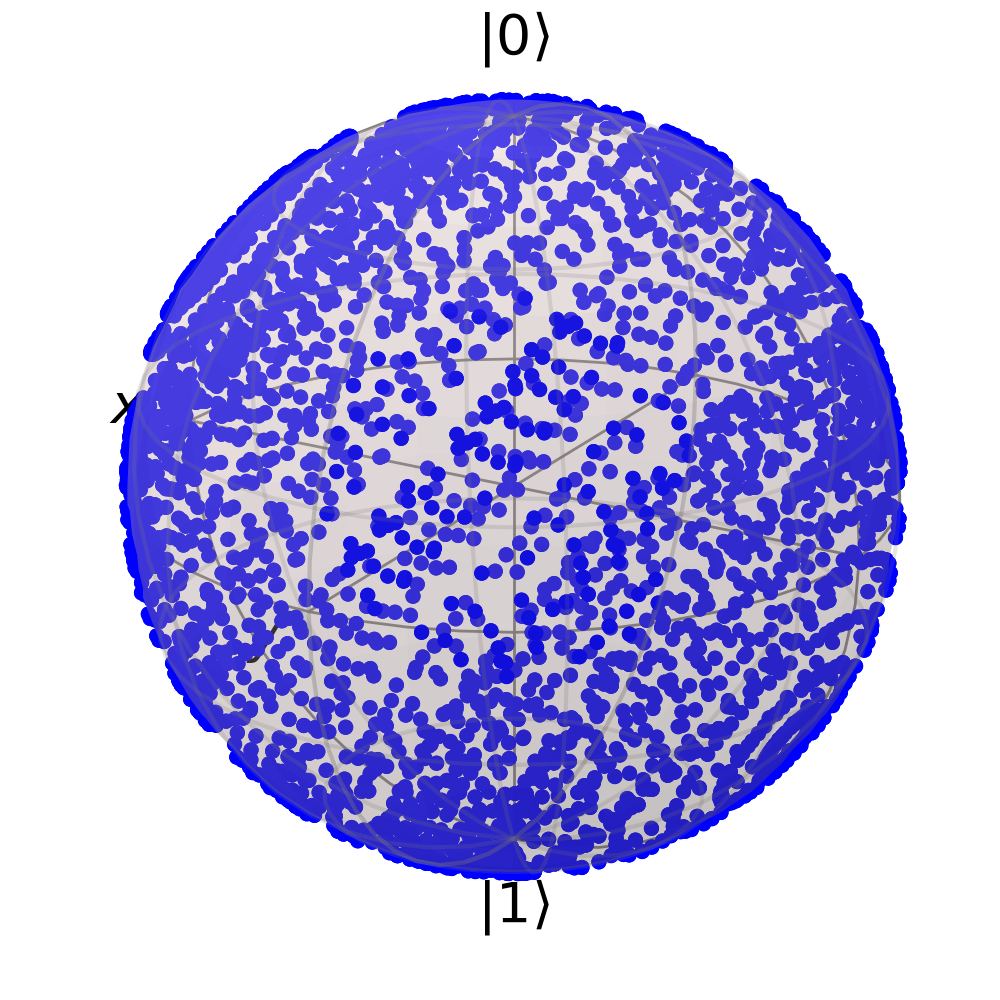

In [51]:
bloch_sphere.render()

### Rotation gates

In [52]:
rx(np.pi/3)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.8660254+0.j  0.       -0.5j]
 [0.       -0.5j 0.8660254+0.j ]]

<IPython.core.display.Javascript object>


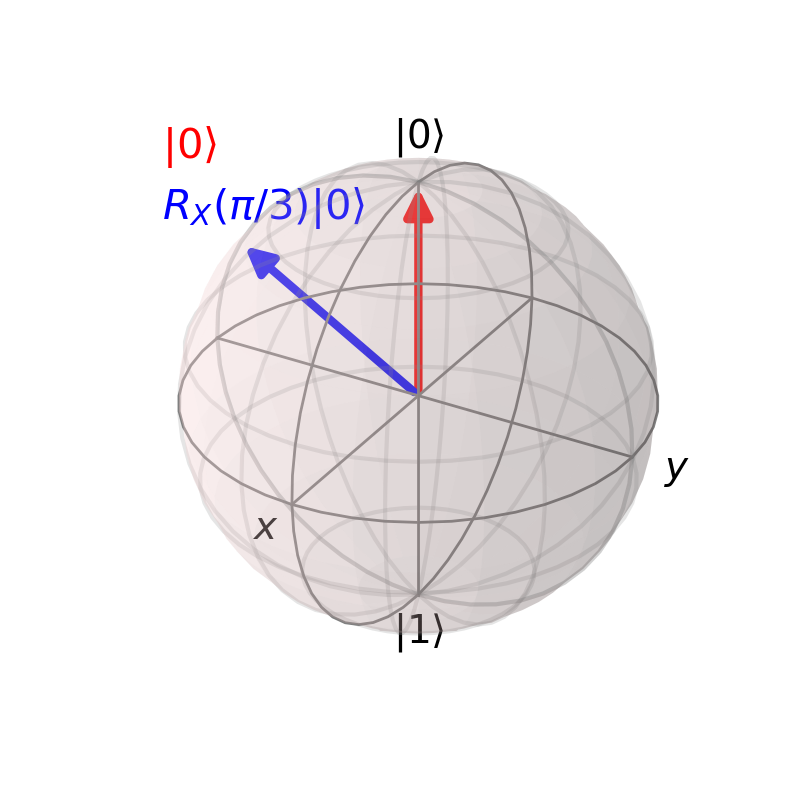

In [53]:
psi_0 = qt.basis(2,0) # |0>
psi_1 = rx(np.pi/3) * psi_0 # R|0>

# create the Bloch sphere
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs)
bloch_sphere.figsize = [3,3]
bloch_sphere.font_size = 14
bloch_sphere.vector_color = ['r', 'b']

# plot the state on the Bloch spheres
bloch_sphere.add_states([psi_0, psi_1])  

bloch_sphere.render(fig=fig, axes=axs)
axs.annotate(r'$|0\rangle$', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=15, color='r')
axs.annotate(r'$R_X(\pi/3)|0\rangle$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=15, color='b')

plt.show()

## Two qubit gates

### iSWAP

In [54]:
iswap()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]